In [1]:
from collections import Counter
%matplotlib inline
import matplotlib.pyplot as plt
import itertools as it
import numpy as np


# We first load the prime and call it M.
with open('M77232917.txt') as readfile:
    M = readfile.readlines()

M = [L.strip() for L in M]
M = ''.join(M)
print('M has {} digits'.format(len(M)))

M has 23249425 digits


Number of times a digit appears in M:
 {0: 2325846, 1: 2324106, 2: 2323306, 3: 2325845, 4: 2326305, 5: 2325065, 6: 2324655, 7: 2324051, 8: 2326039, 9: 2324207} 

Number of times a digit appears in M as a percentage:
 {0: 10.0, 1: 10.0, 2: 9.9900000000000002, 3: 10.0, 4: 10.01, 5: 10.0, 6: 10.0, 7: 10.0, 8: 10.0, 9: 10.0} 

Sum of all the digits in M is 104621260.
	This digit sum gives remainder 1 when divided by 3.


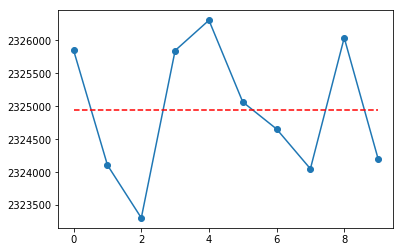

In [2]:
C = dict(Counter(M))
D = {i:0 for i in range(10)}
E = {i:0 for i in range(10)}
digit_sum = 0

for digit in range(10):
    D[digit] = C[str(digit)]
    E[digit] = np.round(C[str(digit)]/len(M)*100, 2)
    digit_sum += digit*D[digit]

print('Number of times a digit appears in M:\n {} \n'.format(D))
print('Number of times a digit appears in M as a percentage:\n {} \n'.format(E))
print('Sum of all the digits in M is {}.\n\tThis digit sum gives remainder {} when divided by 3.'.format(digit_sum, digit_sum%3))
plt.plot(D.values(), 'o-')
plt.plot([0,9], [len(M)/10, len(M)/10], 'r--')
plt.show()

In [3]:
print('Leading digits of M are:  {}...'.format(M[0:10]))
print('Trailing digits of M are: ...{}'.format(M[-10:]))
print('Longest instance of a repeating digit is a string of ten 9\'s')

Leading digits of M are:  4673331833...
Trailing digits of M are: ...9762179071
Longest instance of a repeating digit is a string of ten 9's


In [4]:
N = np.array(list(map(int, M)))

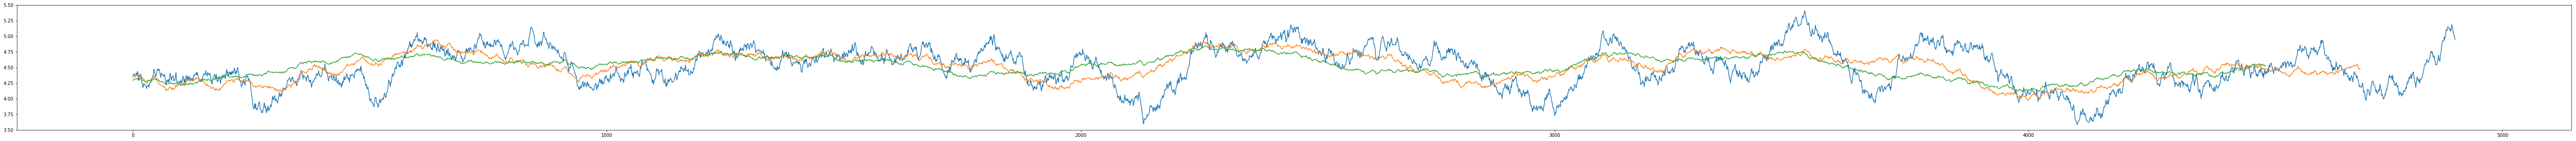

In [14]:
def rolling_mean(sequence, window):
    rmean = [np.mean(sequence[0: window])]
    for i in range(window, len(sequence)):
        rmean.append(rmean[-1] + sequence[i]/window - sequence[i - window]/window)
    return rmean

plt.figure(figsize=(100,5))
window = 100; plt.plot(rolling_mean(N[0: 5000], window))
window = 300; plt.plot(rolling_mean(N[0: 5000], window))
window = 500; plt.plot(rolling_mean(N[0: 5000], window))
plt.savefig('Rolling_mean.png')
plt.show()

In [16]:
def estimated_autocorrelation(x):
    """
    http://stackoverflow.com/q/14297012/190597
    http://en.wikipedia.org/wiki/Autocorrelation#Estimation
    """
    n = len(x)
    variance = x.var()
    x = x - x.mean()
    r = np.correlate(x, x, mode = 'full')[-n:]
    assert np.allclose(r, np.array([(x[:n-k]*x[-(n-k):]).sum() for k in range(n)]))
    result = r/(variance*(np.arange(n, 0, -1)))
    return result

In [15]:
print('0'*7 in M, '0'*8 in M)
print('1'*7 in M, '1'*8 in M)
print('2'*8 in M, '2'*9 in M)
print('3'*8 in M, '3'*9 in M)
print('4'*7 in M, '4'*8 in M)
print('5'*7 in M, '5'*8 in M)
print('6'*8 in M, '6'*9 in M)
print('7'*6 in M, '7'*7 in M)
print('8'*7 in M, '8'*8 in M)
print('9'*10 in M, '9'*11 in M)

True False
True False
True False
True False
True False
True False
True False
True False
True False
True False
